### Importing important libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Test Dataset

In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Credit Card Fraud Detection/TEST.csv')

In [ ]:
test_data.shape

(352, 30)

In [ ]:
rob_scaler = RobustScaler()
test_data['scaled_amount'] = rob_scaler.fit_transform(test_data['Amount'].values.reshape(-1,1))
test_data.drop(['Amount','Index'], axis=1, inplace=True)
scaled_amount = test_data['scaled_amount']
test_data.drop(['scaled_amount'], axis=1, inplace=True)
test_data.insert(0, 'scaled_amount', scaled_amount)

### Train Dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Credit Card Fraud Detection/TRAIN.csv')

In [ ]:
data.shape

(284455, 31)

In [ ]:
data.head()

,Index,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,2.245295,-1.160960,-1.966682,-1.430190,-0.607246,-1.508696,-0.074415,-0.655096,-1.970141,1.607283,-0.780267,-0.294928,1.236719,-0.135565,-0.832677,-1.400205,0.807960,-0.670317,-0.044106,-0.292081,0.010490,0.521714,-0.064971,0.048849,0.383290,0.103970,-0.047350,-0.064800,74.75,0
1,1,1.278609,0.102574,0.512079,0.003930,-0.723474,-1.334105,0.029958,-0.296595,0.128119,-0.209865,0.188511,0.674525,0.712608,0.122319,1.038024,0.128638,-0.222614,-0.687546,-0.056504,-0.040015,-0.081470,-0.182506,0.078986,0.789993,0.219794,0.938359,-0.078720,0.008119,1.38,0
2,2,1.466457,0.026088,-0.499298,-0.674372,-0.144883,-1.178075,0.058089,-0.420145,-1.359651,0.210249,-0.033777,-0.001594,1.767471,-1.212943,0.427684,1.252714,0.843412,-1.534474,0.830734,0.207653,-0.234087,-0.710542,-0.001242,-0.174713,0.533719,-0.454779,0.001524,0.030935,10.95,0
3,3,-0.922137,-0.371579,2.132018,-0.796997,0.324175,-1.162006,0.277208,-0.249586,-0.775648,-0.061757,-0.959725,0.408746,0.597641,-0.802430,-1.889520,-1.607785,-0.401475,0.729773,-2.445693,-0.461062,-0.302654,-0.246899,-0.045745,0.677110,0.016109,-0.734220,-0.034480,-0.064786,8.04,0
4,4,-1.166525,0.255439,2.108464,0.135019,-0.072979,0.910821,0.755918,0.355528,-0.422820,-0.842826,0.663538,0.624657,0.107262,-0.073654,-0.305506,0.618642,-0.952529,0.757618,-0.375461,0.353355,0.136470,0.017496,0.121017,0.636266,0.492943,-0.750242,0.029124,0.091303,175.00,0


In [ ]:
data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data.drop(['Amount','Index'], axis=1, inplace=True)
scaled_amount = data['scaled_amount']
data.drop(['scaled_amount'], axis=1, inplace=True)
data.insert(0, 'scaled_amount', scaled_amount)

In [ ]:
data.head()

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.736732,2.245295,-1.160960,-1.966682,-1.430190,-0.607246,-1.508696,-0.074415,-0.655096,-1.970141,1.607283,-0.780267,-0.294928,1.236719,-0.135565,-0.832677,-1.400205,0.807960,-0.670317,-0.044106,-0.292081,0.010490,0.521714,-0.064971,0.048849,0.383290,0.103970,-0.047350,-0.064800,0
1,-0.287989,1.278609,0.102574,0.512079,0.003930,-0.723474,-1.334105,0.029958,-0.296595,0.128119,-0.209865,0.188511,0.674525,0.712608,0.122319,1.038024,0.128638,-0.222614,-0.687546,-0.056504,-0.040015,-0.081470,-0.182506,0.078986,0.789993,0.219794,0.938359,-0.078720,0.008119,0
2,-0.154330,1.466457,0.026088,-0.499298,-0.674372,-0.144883,-1.178075,0.058089,-0.420145,-1.359651,0.210249,-0.033777,-0.001594,1.767471,-1.212943,0.427684,1.252714,0.843412,-1.534474,0.830734,0.207653,-0.234087,-0.710542,-0.001242,-0.174713,0.533719,-0.454779,0.001524,0.030935,0
3,-0.194972,-0.922137,-0.371579,2.132018,-0.796997,0.324175,-1.162006,0.277208,-0.249586,-0.775648,-0.061757,-0.959725,0.408746,0.597641,-0.802430,-1.889520,-1.607785,-0.401475,0.729773,-2.445693,-0.461062,-0.302654,-0.246899,-0.045745,0.677110,0.016109,-0.734220,-0.034480,-0.064786,0
4,2.136872,-1.166525,0.255439,2.108464,0.135019,-0.072979,0.910821,0.755918,0.355528,-0.422820,-0.842826,0.663538,0.624657,0.107262,-0.073654,-0.305506,0.618642,-0.952529,0.757618,-0.375461,0.353355,0.136470,0.017496,0.121017,0.636266,0.492943,-0.750242,0.029124,0.091303,0


### Exploratory Data Analysis

In [ ]:
data.isna().sum()

scaled_amount    0
V1               0
V2               0
V3               0
V4               0
V5               0
V6               0
V7               0
V8               0
V9               0
V10              0
V11              0
V12              0
V13              0
V14              0
V15              0
V16              0
V17              0
V18              0
V19              0
V20              0
V21              0
V22              0
V23              0
V24              0
V25              0
V26              0
V27              0
V28              0
Class            0
dtype: int64

So we can conclude that our dataset contains zero null values.

In [ ]:
data.describe()

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000
mean,0.926811,0.000779,-0.000811,0.001275,-0.000793,0.000592,0.000186,0.000951,-0.000270,0.000505,0.000948,-0.000669,0.001013,0.000120,0.001309,0.000053,0.000711,0.001262,0.000469,-0.000116,-0.000029,-0.000171,-0.000050,0.000027,0.000018,-0.000051,0.000028,-0.000037,-0.000028,0.001547
std,3.494103,1.956147,1.650234,1.510626,1.414216,1.378329,1.332161,1.232971,1.190897,1.097805,1.085083,1.018770,0.993861,0.995318,0.951702,0.915289,0.872882,0.839648,0.836807,0.813859,0.771083,0.732765,0.725495,0.624473,0.605645,0.521274,0.482243,0.403488,0.330127,0.039299
min,-0.307263,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-13.563273,-25.162799,-9.335193,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000
25%,-0.229050,-0.920117,-0.598750,-0.889749,-0.848835,-0.691343,-0.768227,-0.553788,-0.208633,-0.642669,-0.535273,-0.762625,-0.405250,-0.648393,-0.425253,-0.582798,-0.467797,-0.483632,-0.498663,-0.456281,-0.211704,-0.228434,-0.542432,-0.161861,-0.354545,-0.317194,-0.326951,-0.070845,-0.052957,0.000000
50%,0.000000,0.018330,0.065238,0.179953,-0.020206,-0.054243,-0.274172,0.040265,0.022328,-0.051183,-0.092820,-0.032963,0.140170,-0.013518,0.050731,0.048122,0.066473,-0.065577,-0.003506,0.003738,-0.062480,-0.029520,0.006675,-0.011192,0.040977,0.016461,-0.052077,0.001337,0.011238,0.000000
75%,0.770950,1.315693,0.803357,1.027332,0.742635,0.612015,0.398641,0.570515,0.327214,0.597346,0.454005,0.739251,0.618276,0.662590,0.493220,0.648842,0.523282,0.399776,0.500875,0.458768,0.133013,0.186326,0.528481,0.147659,0.439527,0.350697,0.240929,0.091023,0.078271,0.000000
max,358.507821,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,1.000000


**Observations from describe method:**
- Features such as 'V2', 'V4', 'V5', 'V6', etc. has very high value as compared to the 75% value, thus we can say there are features in the dataset which has outliers. We need to remove these outliers.

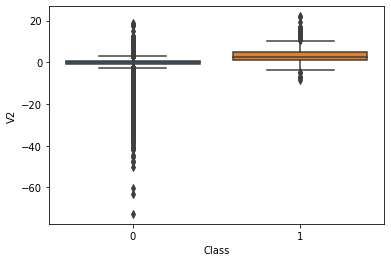

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data['Class'],data['V2'])
plt.show()

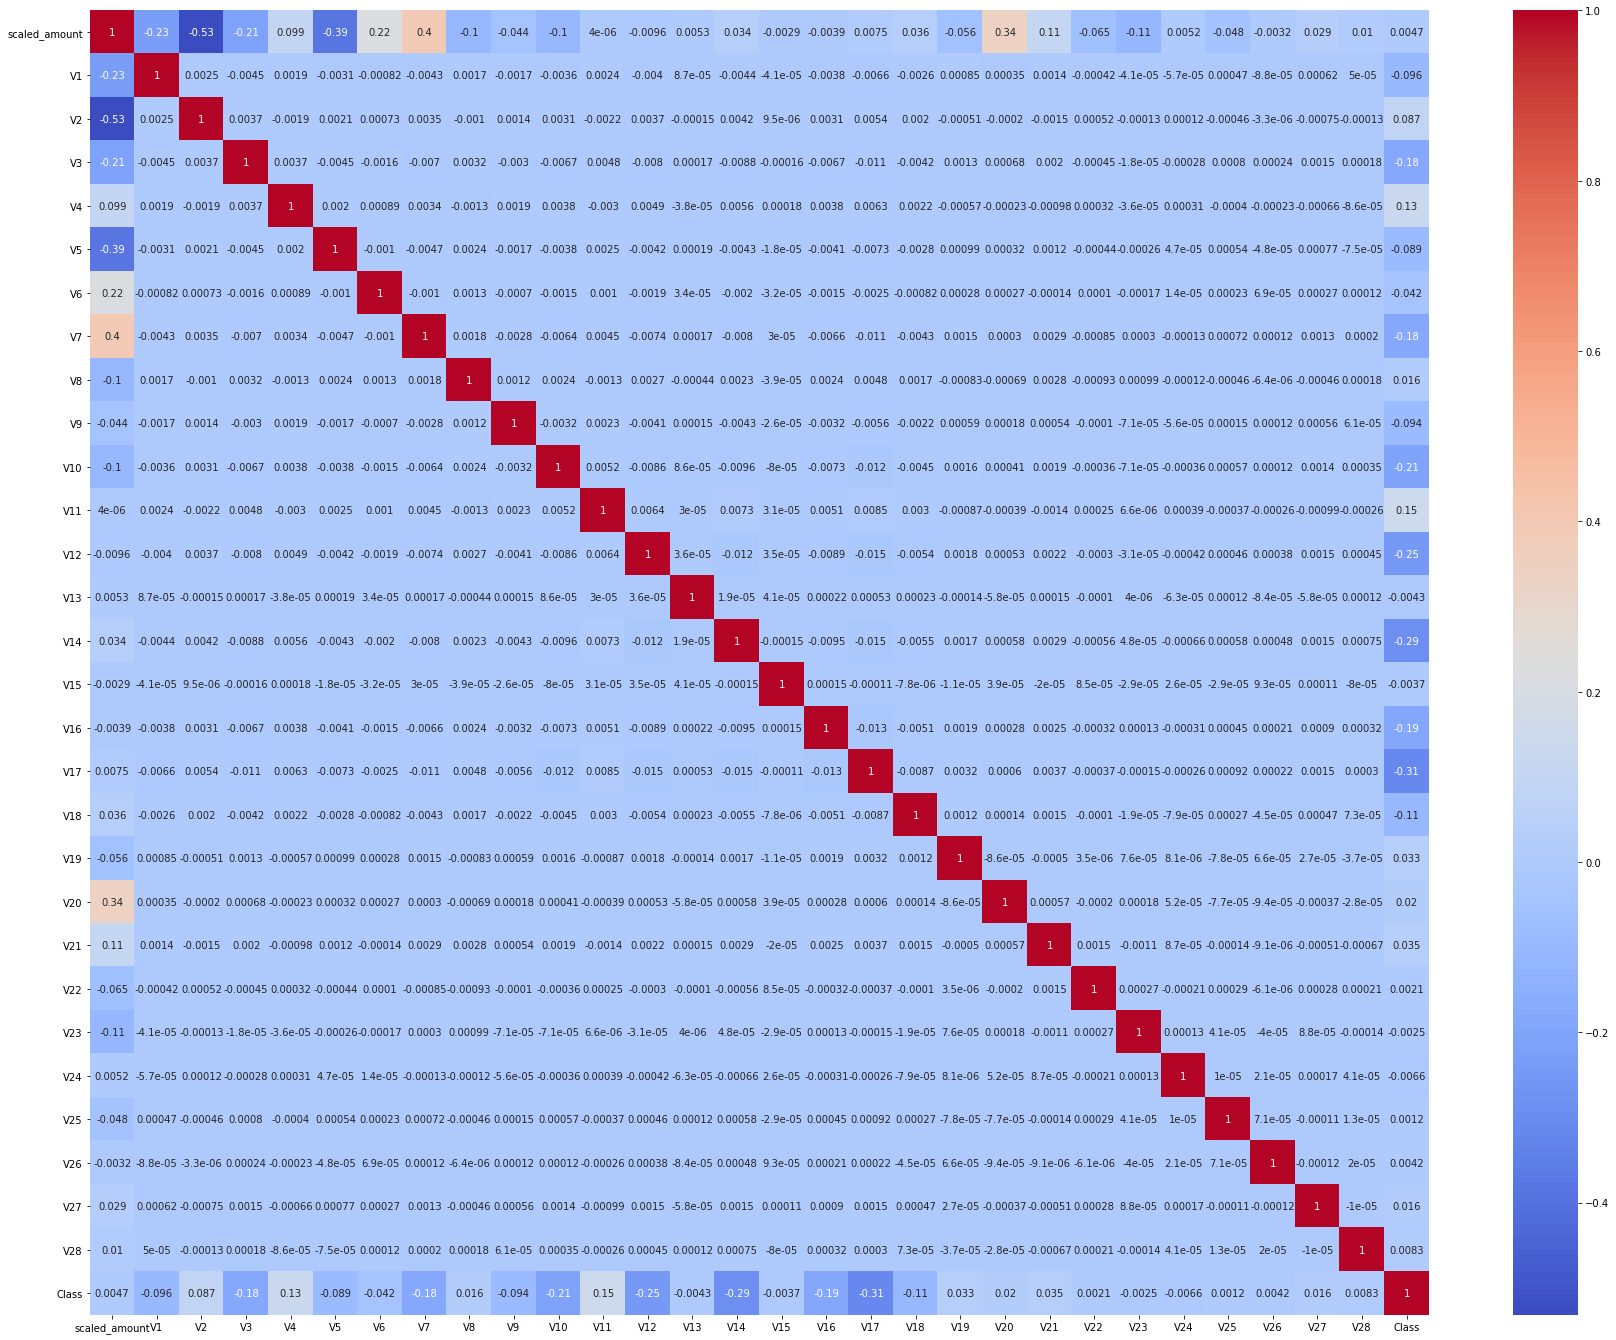

In [ ]:
plt.figure(figsize=(30,24))
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)
plt.show()

In [ ]:
data['Class'].value_counts()

0    284015
1       440
Name: Class, dtype: int64

We can notice data in the target column is highly imbalanced, to remove this imbalance, we will perform unsersampling/oversampling.

### Using Pywedge library

In [ ]:
import pywedge as pw
ppd = pw.Pre_process_data(data, test_data, c=None, y='Class', type="Classification")

In [ ]:
new_X, new_y, new_test = ppd.dataframe_clean()

Reading the datasets...
******************************************

Train Dataframe summary...
******************************************

Your selected train dataframe has 30 columns and 284455 Rows.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Zero Values, Missing Values, % of Total Values, Total Zero Missing Values, % Total Zero Missing Values, Data Type]
Index: []
******************************************
Class balance summary table
0    284015
1       440
Name: Class, dtype: int64

 Class imbalance % is  0.15 %
Starting data cleaning...
******************************************
Do you want to use get_dummies or catcodes to convert categorical to numerical? 
	press 1 for catcodes - Quick info link - https://bit.ly/3lruqtf 
	press 2 for getdummies - Quick info link - https://bit.ly/3d76p7A 
1
Comleted categorical column transformation
******************************************
Do you want to standardize the data? 
	press 1 for Standard Scalar - Quick inf

In [ ]:
X = new_X
y = new_y
so_test = new_test

In [ ]:
blm = pw.baseline_model(X,y)

In [ ]:
blm.classification_summary()

Starting classification_summary...
TOP 10 FEATURE IMPORTANCE
V14    0.14
V4     0.12
V8     0.06
V12    0.06
V18    0.06
V27    0.04
V2     0.04
V3     0.04
V6     0.04
V9     0.04
dtype: float64
Please enter test size (for eg. please enter 0.20 for 20% test size):
0.2
Logistic       | acc_score = 0.948 | roc_score = 0.948 | f1_score(macro) = 0.948 | Train time = 6.077s | Pred. time = 0.008s
KNN(3)         | acc_score = 0.999 | roc_score = 0.999 | f1_score(macro) = 0.999 | Train time = 4.163s | Pred. time = 170.534s
Decision Tree  | acc_score = 0.978 | roc_score = 0.978 | f1_score(macro) = 0.978 | Train time = 20.477s | Pred. time = 0.017s
Random Forest  | acc_score = 0.962 | roc_score = 0.962 | f1_score(macro) = 0.962 | Train time = 21.417s | Pred. time = 0.104s
Neural Net     | acc_score = 0.976 | roc_score = 0.976 | f1_score(macro) = 0.976 | Train time = 48.437s | Pred. time = 0.096s
XGBoost        | acc_score = 0.954 | roc_score = 0.954 | f1_score(macro) = 0.954 | Train time = 19.8

### Splitting Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

### Using KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(3,p=1)

In [ ]:
knn_model = knn.fit(X_train,y_train)

In [ ]:
print("Training accuracy is: ",knn_model.score(X_train,y_train))
print("Validation accuracy is: ",knn_model.score(X_test,y_test))

Training accuracy is:  0.9997557347323205
Validation accuracy is:  0.9993838353608084


### Using Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(random_state=42)

In [ ]:
rf_model = rfc.fit(X_train,y_train)

In [ ]:
print("Training accuracy is: ",rf_model.score(X_train,y_train))
print("Validation accuracy is: ",rf_model.score(X_test,y_test))

Training accuracy is:  0.9999977994120028
Validation accuracy is:  0.9998855694241501


### Using ExtraTrees Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
etc = ExtraTreesClassifier(random_state=42)

In [ ]:
etc_model = etc.fit(X_train,y_train)

In [ ]:
print("Training accuracy is: ",etc_model.score(X_train,y_train))
print("Validation accuracy is: ",etc_model.score(X_test,y_test))

Training accuracy is:  1.0
Validation accuracy is:  0.9998679647201733
